In [23]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns

In [24]:
myfolder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/neuroseq_notebooks/"

In [25]:
file_df = pd.read_csv(myfolder+'/file_tracking.tsv', sep='\t', index_col=0)

file_df

,type,time_point,description,path
label,,,,
all_sample_h5,scanpy h5 file,all,Scanpy file with subsample of cells from all t...,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_h5,scanpy h5 file,D11,scanpy file with all D11 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_h5,scanpy h5 file,D30,scanpy file with all D30 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_h5,scanpy h5 file,D52,scanpy file with all D52 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_cell_fractions,tsv,D11,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_cell_fractions,tsv,D30,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_cell_fractions,tsv,D52,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_efficiency,tsv,D52,differentiation efficiency for each cell line,/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_trajectories,tsv,all,"all differentiation trajectories, restricted t...",/nfs/leia/research/stegle/dseaton/hipsci/singl...


In [26]:
file = file_df.loc['all_sample_h5','path']

In [27]:
file

'/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_subsample_v1/pool1_17_subsample_v1.scanpy.w_metadata.w_celltype.scanpy.h5'

In [28]:
adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [29]:
# subsample
fraction = 1
# fraction = 0.2
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [30]:
adata.n_obs

205416

In [31]:
adata.n_vars

32738

In [32]:
fig_format = 'pdf'
sc.set_figure_params(dpi_save=300,format=fig_format)
rcParams['figure.figsize'] = 5,4

In [33]:
plotting_fcn = sc.pl.umap

fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
sc.settings.figdir = fig_folder

In [34]:
dim_reduction = 'X_umap'
FS = 16

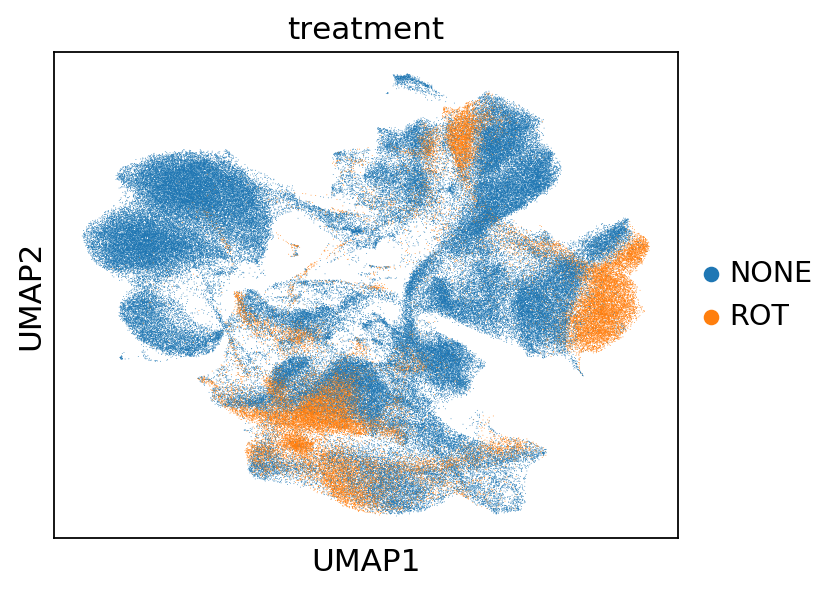

In [35]:
plotting_fcn(adata, color='treatment')

In [60]:
time_point = 'D52'
treatment_list = ['ROT','NONE','other']
cat_type = pd.CategoricalDtype(categories = treatment_list, ordered=True)
column = 'treatment_{}'.format(time_point)
adata.obs[column] = (adata.obs
                         .apply(lambda x: x['treatment'] if x['time_point']==time_point else 'other', axis=1)
                         .astype(cat_type))

In [61]:
adata.obs['treatment_D52']

index
ATCGAGTTCAAACGGG-1-60      NONE
ACCAGTAAGACCTAGG-1-81     other
GCTGCAGCAACCGCCA-1-46     other
AACTCCCTCGACAGCC-1-66     other
CGTCCATGTAGGCTGA-1-53      NONE
                          ...  
TTCTTAGTCTTCGGTC-1-123    other
TGAGGGAGTACCCAAT-1-79     other
TCAGATGCATGACGGA-1-120      ROT
ACTTTCAAGACCGGAT-1-26     other
TACACGAAGTGTCCCG-1-145     NONE
Name: treatment_D52, Length: 205416, dtype: category
Categories (3, object): [ROT < NONE < other]

In [62]:
adata.obs['treatment_D52'].cat.categories

Index(['ROT', 'NONE', 'other'], dtype='object')

In [67]:
mypalette = ['firebrick','black','lightgrey']

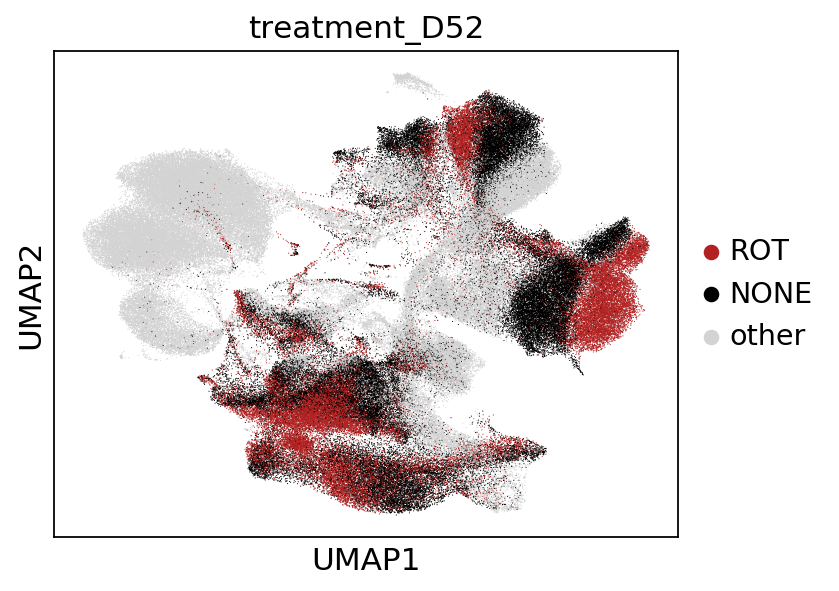

In [69]:
time_point = 'D52'
column = 'treatment_{}'.format(time_point)
plotting_fcn(adata, color=column, palette=mypalette, size=1, save = "Supp_Fig_2d.pdf")